In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import InputLayer, Dense 
%matplotlib inline

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# https://www.kaggle.com/aliounediop/randomforest-92-and-neuralnetwork-81


In [3]:
df=pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
print("Mushrooms dataset dimensions : {}".format(df.shape))

Mushrooms dataset dimensions : (8124, 23)


In [7]:
df.groupby('class').size()

class
e    4208
p    3916
dtype: int64

In [8]:
# df = df.drop(columns = ['veil-type', 'bruises', 'veil-color', 'gill-attachment'])
df = df.drop(columns = 'veil-type')

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [10]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in df.columns:
    df[col] = Encoder_X.fit_transform(df[col])
# Encoder_y=LabelEncoder()
#replace numerical values: if the mushroom is poisonous, y = 1; if the mushroom is not poisonous, y = 0
# y = Encoder_y.fit_transform(y)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [11]:
#Plotting the variables using histogram
# df.hist(figsize=(30,20))

In [12]:
#Checking for missing values
# df.isna().sum()

In [13]:
#split dataset into features and label
X = df.drop(columns=['class'])
# X = X.drop(columns = ['veil-type'])
y = df['class']
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [14]:
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [15]:
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#What is random_state?

In [16]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 1.03022822,  0.13973799, -1.76668189, ..., -1.09445396,
         0.28013546,  2.03247825],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -0.67522295,
         1.07299272, -0.87398302],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -1.09445396,
         0.28013546, -0.87398302],
       ...,
       [-0.85091425,  0.95299304, -0.19580684, ..., -0.25599193,
         1.07299272,  1.45118599],
       [-0.22386676,  0.13973799, -0.98124436, ...,  1.42093215,
         0.28013546,  1.45118599],
       [-0.22386676, -1.48677212, -0.5885256 , ...,  1.42093215,
        -1.30557906, -0.29269077]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
X_train

array([[-0.37360281, -0.18740388],
       [-1.45745777, -1.52488046],
       [-1.49522611,  2.23523737],
       ...,
       [-2.65977967, -1.46748596],
       [ 2.80404499, -0.83541794],
       [ 0.95298106,  0.68156011]])

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))

In [23]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion='entropy', max_depth = 8)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

In [24]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
DTAccuracy = metrics.accuracy_score(y_test, y_pred)
print("DT Test Accuracy:", DTAccuracy)

DT Test Accuracy: 0.9384741591468416


In [25]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [26]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9588

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2951
           1       0.96      0.95      0.96      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2854   97]
 [ 137 2598]]

Average Accuracy:	0.9416

Standard Deviation:	0.0044


In [27]:
# visualization_train('Decision Tree')

In [28]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9385

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1257
           1       0.94      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1189   68]
 [  82 1099]]

Average Accuracy:	0.9416

Standard Deviation:	0.0043


In [29]:
# visualization_test('Decision Tree')

In [30]:
from sklearn.model_selection import learning_curve
# from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [31]:
# train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[0.6, 0.7, 0.8], cv=5)

In [32]:
# train_scores

In [33]:
# valid_scores

In [34]:
print(8124*0.7)

5686.799999999999


In [35]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1, 20):

    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf.fit(X_train,y_train)
    
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

In [36]:
print(test_scores)

[0.7255947497949139, 0.7834290401968826, 0.9073010664479081, 0.9073010664479081, 0.9327317473338802, 0.938884331419196, 0.938884331419196, 0.9397046759639048, 0.9392945036915504, 0.9351927809680065, 0.933552091878589, 0.9315012305168171, 0.9310910582444627, 0.9306808859721083, 0.9294503691550451, 0.9315012305168171, 0.9273995077932732, 0.9290401968826907, 0.9294503691550451]


In [37]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and max_depth = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.52514948997538 % and max_depth = [19]


In [38]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and max_depth = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 93.97046759639048 % and max_depth = [8]
8


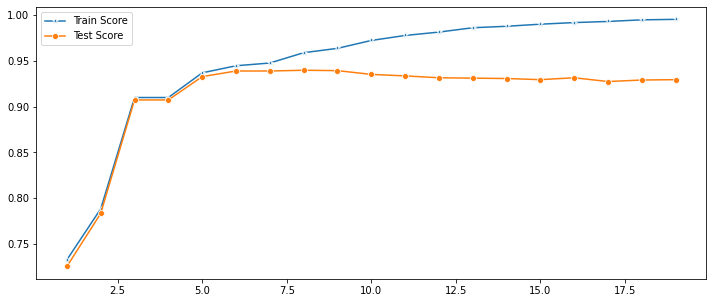

In [39]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [40]:
###NEURAL NETWORK MLP
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# X, y = make_classification(n_samples=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)


In [44]:
#Add classifier and fit the data
classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', max_iter=300, learning_rate_init = 0.01)
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', learning_rate_init=0.01, max_iter=300,
              random_state=42, solver='sgd')

In [45]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9214

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2951
           1       0.95      0.88      0.92      2735

    accuracy                           0.92      5686
   macro avg       0.92      0.92      0.92      5686
weighted avg       0.92      0.92      0.92      5686


Confusion Matrix:
[[2828  123]
 [ 324 2411]]

Average Accuracy:	0.9136

Standard Deviation:	0.0068


In [47]:
# visualization_train('MLP')

In [48]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9143

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1257
           1       0.94      0.88      0.91      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1194   63]
 [ 146 1035]]

Average Accuracy:	0.9136

Standard Deviation:	0.0068


In [49]:
# visualization_test('MLP')

In [50]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
MLPAccuracy = metrics.accuracy_score(y_test, y_pred)
print("MPL Test Accuracy:", MLPAccuracy)

MPL Test Accuracy: 0.9142739950779327


In [51]:
# scores=cross_val_score(model,X,y,cv=cv,verbose=0)
# score.mean()

In [52]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier = KNN()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9573

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2951
           1       0.97      0.94      0.95      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2877   74]
 [ 169 2566]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [54]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)


Test results:

Accuracy Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1257
           1       0.96      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1207   50]
 [  85 1096]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [55]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1,20):

    knn = KNN(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [56]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [57]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 94.46267432321575 % and k = [5]
5


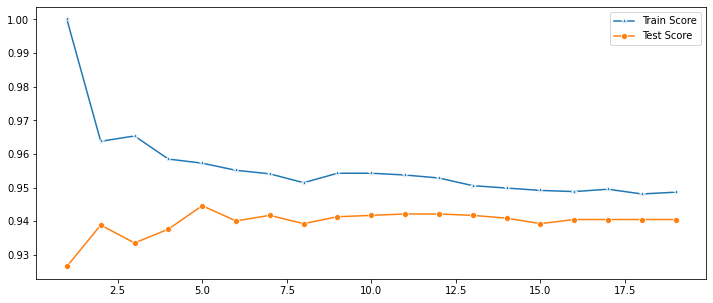

In [58]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [59]:
classifier = KNN(k)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
KNNAccuracy = metrics.accuracy_score(y_test, y_pred)

print("KNN Test Accuracy:", KNNAccuracy)

KNN Test Accuracy: 0.9446267432321575


In [60]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9573

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2951
           1       0.97      0.94      0.95      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2877   74]
 [ 169 2566]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [61]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1257
           1       0.96      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1207   50]
 [  85 1096]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [62]:
# visualization_train('K-NN')

In [68]:
# visualization_test('K-NN')


In [77]:
# # ROC-AUC 
# # ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

# # Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

# from sklearn.metrics import roc_curve
# y_pred_proba = knn.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [78]:
# print(results.mean())

In [79]:
# print_score(classifier,X_train,y_train,X_test,y_test,train=True)

In [80]:
# print_score(classifier,X_train,y_train,X_test,y_test,train=False)

In [81]:
# visualization_train('Ensemble')

In [82]:
# visualization_test('Ensemble')

In [84]:
### Ensemble - Boosting
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators = 60, learning_rate = 0.1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
EAccuracy = metrics.accuracy_score(y_test, y_pred)

print("Ensemble Test Accuracy:", EAccuracy)

Ensemble Test Accuracy: 0.9298605414273995


In [85]:
# print_score(classifier,X_train,y_train,X_test,y_test,train=True)
# print_score(classifier,X_train,y_train,X_test,y_test,train=False)

In [86]:
test_scores = []
train_scores = []


for i in [50, 60, 70, 80, 90, 100]:

    abc = AdaBoostClassifier(n_estimators=i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [87]:
print(test_scores)

[0.9253486464315013, 0.9257588187038556, 0.9245283018867925, 0.9249384741591469, 0.9241181296144381, 0.9245283018867925]


In [88]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 93.51037636299684 % and k = [4]


In [89]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 92.57588187038556 % and k = [2]
2


In [90]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot([50, 60, 70, 80, 90, 100],train_scores,marker='*',label='Train Score')
# p = sns.lineplot([50, 60, 70, 80, 90, 100],test_scores,marker='o',label='Test Score')

In [91]:
test_scores = []
train_scores = []


for i in [0.001, 0.01, 0.1, 1]:

    abc = AdaBoostClassifier(n_estimators=60, learning_rate = i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [92]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 93.45761519521632 % and k = [3]


In [93]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 92.98605414273995 % and k = [3]
3


In [94]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot([0.001, 0.01, 0.1, 1],train_scores,marker='*',label='Train Score')
# p = sns.lineplot([0.001, 0.01, 0.1, 1],test_scores,marker='o',label='Test Score')

In [95]:
#SVC Classification Model rbf
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42, C=10)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy = metrics.accuracy_score(y_test, y_pred)

print("SVC Test Accuracy:", SVCAccuracy)

SVC Test Accuracy: 0.938884331419196


In [96]:
for c in [0.1, 1, 10, 100, 1000]:
    classifier = SVC(kernel='rbf',random_state=42, C=c)
    classifier.fit(X_train,y_train)

In [97]:
test_scores = []
train_scores = []


for c in [0.1, 1, 10, 100, 1000]:

    classifier = SVC(kernel='rbf',random_state=42, C=c)
    classifier.fit(X_train,y_train)
    
    train_scores.append(classifier.score(X_train,y_train))
    test_scores.append(classifier.score(X_test,y_test))


In [98]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max train score 94.47766443897292 % and k = [5]
Max test score 93.8884331419196 % and k = [3, 4]
3


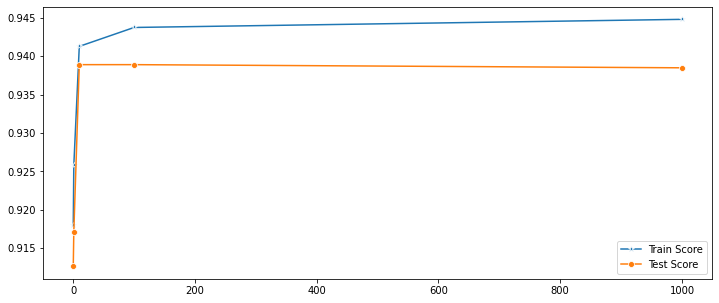

In [99]:
plt.figure(figsize=(12,5))
p = sns.lineplot([0.1, 1, 10, 100, 1000],train_scores,marker='*',label='Train Score')
p = sns.lineplot([0.1, 1, 10, 100, 1000],test_scores,marker='o',label='Test Score')

In [100]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)


Training results:

Accuracy Score: 0.9448

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2951
           1       0.96      0.92      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.95      0.94      0.94      5686


Confusion Matrix:
[[2846  105]
 [ 209 2526]]

Average Accuracy:	0.9441

Standard Deviation:	0.0054


In [101]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9385

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1257
           1       0.95      0.92      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1203   54]
 [  96 1085]]

Average Accuracy:	0.9441

Standard Deviation:	0.0054


In [102]:
# visualization_train('SVC')

In [103]:
# visualization_test('SVC')

In [104]:
#SVC Classification Model sigmoid
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_s = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_s)

SVC (Sigmoid) Test Accuracy: 0.455701394585726


In [105]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.4726

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      2951
           1       0.45      0.46      0.45      2735

    accuracy                           0.47      5686
   macro avg       0.47      0.47      0.47      5686
weighted avg       0.47      0.47      0.47      5686


Confusion Matrix:
[[1436 1515]
 [1484 1251]]

Average Accuracy:	0.4720

Standard Deviation:	0.0138
Test results:

Accuracy Score: 0.4557

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46      1257
           1       0.44      0.45      0.45      1181

    accuracy                           0.46      2438
   macro avg       0.46      0.46      0.46      2438
weighted avg       0.46      0.46      0.46      2438


Confusion Matrix:
[[574 683]
 [644 537]]

Average Accuracy:	0.4720

Standard Deviation:	0.0138


In [106]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.4726

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      2951
           1       0.45      0.46      0.45      2735

    accuracy                           0.47      5686
   macro avg       0.47      0.47      0.47      5686
weighted avg       0.47      0.47      0.47      5686


Confusion Matrix:
[[1436 1515]
 [1484 1251]]

Average Accuracy:	0.4720

Standard Deviation:	0.0138
Test results:

Accuracy Score: 0.4557

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46      1257
           1       0.44      0.45      0.45      1181

    accuracy                           0.46      2438
   macro avg       0.46      0.46      0.46      2438
weighted avg       0.46      0.46      0.46      2438


Confusion Matrix:
[[574 683]
 [644 537]]

Average Accuracy:	0.4720

Standard Deviation:	0.0138


In [107]:
#SVC Classification Model Linear
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_l = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_l)

SVC (Sigmoid) Test Accuracy: 0.756357670221493


Text(0.5, 1.0, 'SVC kernels Prediction Accuracies Comparison')

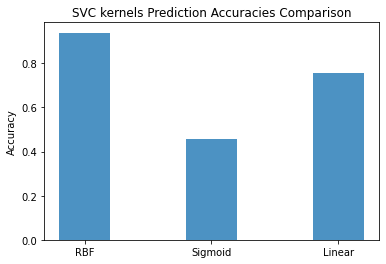

In [108]:
kernels = [SVCAccuracy, SVCAccuracy_s, SVCAccuracy_l]
kernels_label = ('RBF', 'Sigmoid', 'Linear')
y_pos = np.arange(len(kernels_label))
plt.bar(y_pos, kernels, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, kernels_label)
plt.ylabel('Accuracy')
plt.title('SVC kernels Prediction Accuracies Comparison')

In [109]:
print(kernels)

[0.938884331419196, 0.455701394585726, 0.756357670221493]


Text(0.5, 1.0, 'Prediction Accuracy Comparison')

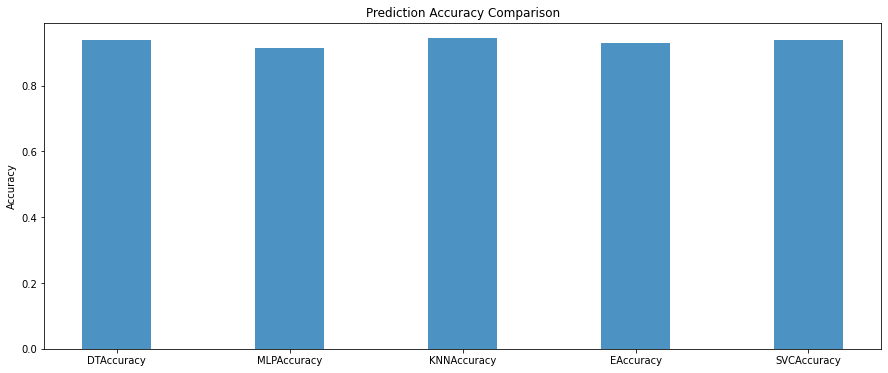

In [110]:
accuracy = [DTAccuracy, MLPAccuracy, KNNAccuracy, EAccuracy, SVCAccuracy]
plt.figure(figsize=(15,6))
x_label = ('DTAccuracy', 'MLPAccuracy', 'KNNAccuracy', 'EAccuracy', 'SVCAccuracy')
y_pos = np.arange(len(x_label))
plt.bar(y_pos, accuracy, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, x_label)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy Comparison')

In [111]:
print(accuracy)

[0.9384741591468416, 0.9142739950779327, 0.9446267432321575, 0.9298605414273995, 0.938884331419196]


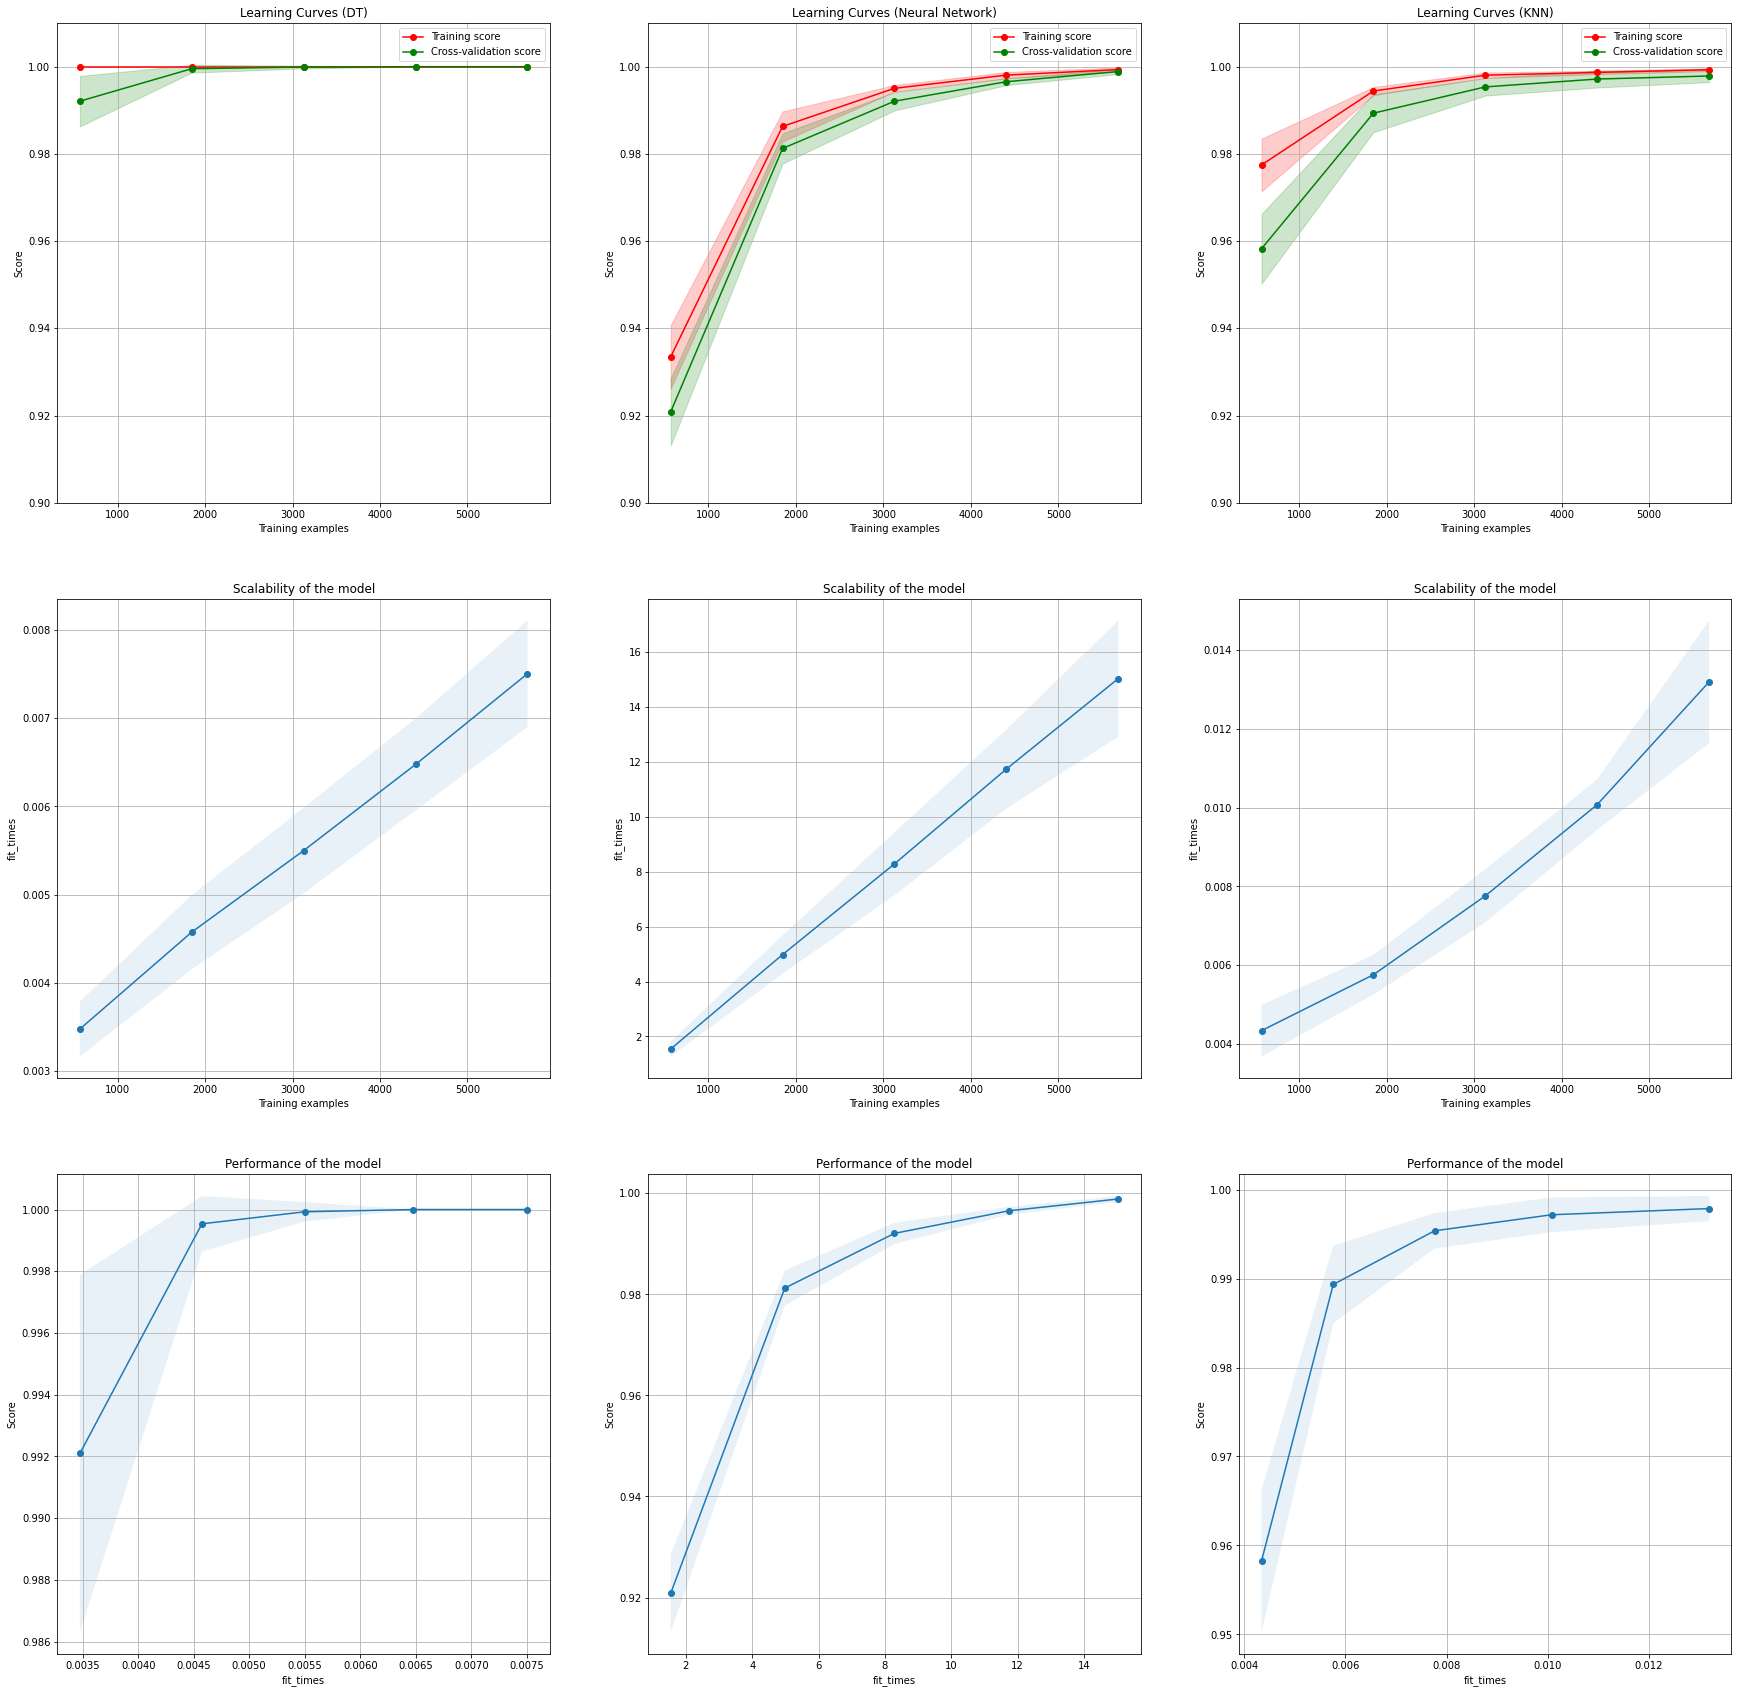

In [119]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(30, 30))

title = "Learning Curves (DT)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth = 9)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', learning_rate_init = 0.01, max_iter=300)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = KNN()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)




# title = "Learning Curves (Ensemble)"
# cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
# estimator = GradientBoostingClassifier(random_state=7, learning_rate = 0.1)
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.9, 1.01),
#                     cv=cv, n_jobs=4)



# title = "Learning Curves (SVM)"
# cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# estimator = SVC(kernel='rbf',random_state=42)
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.9, 1.01),
#                     cv=cv, n_jobs=4)



plt.show()

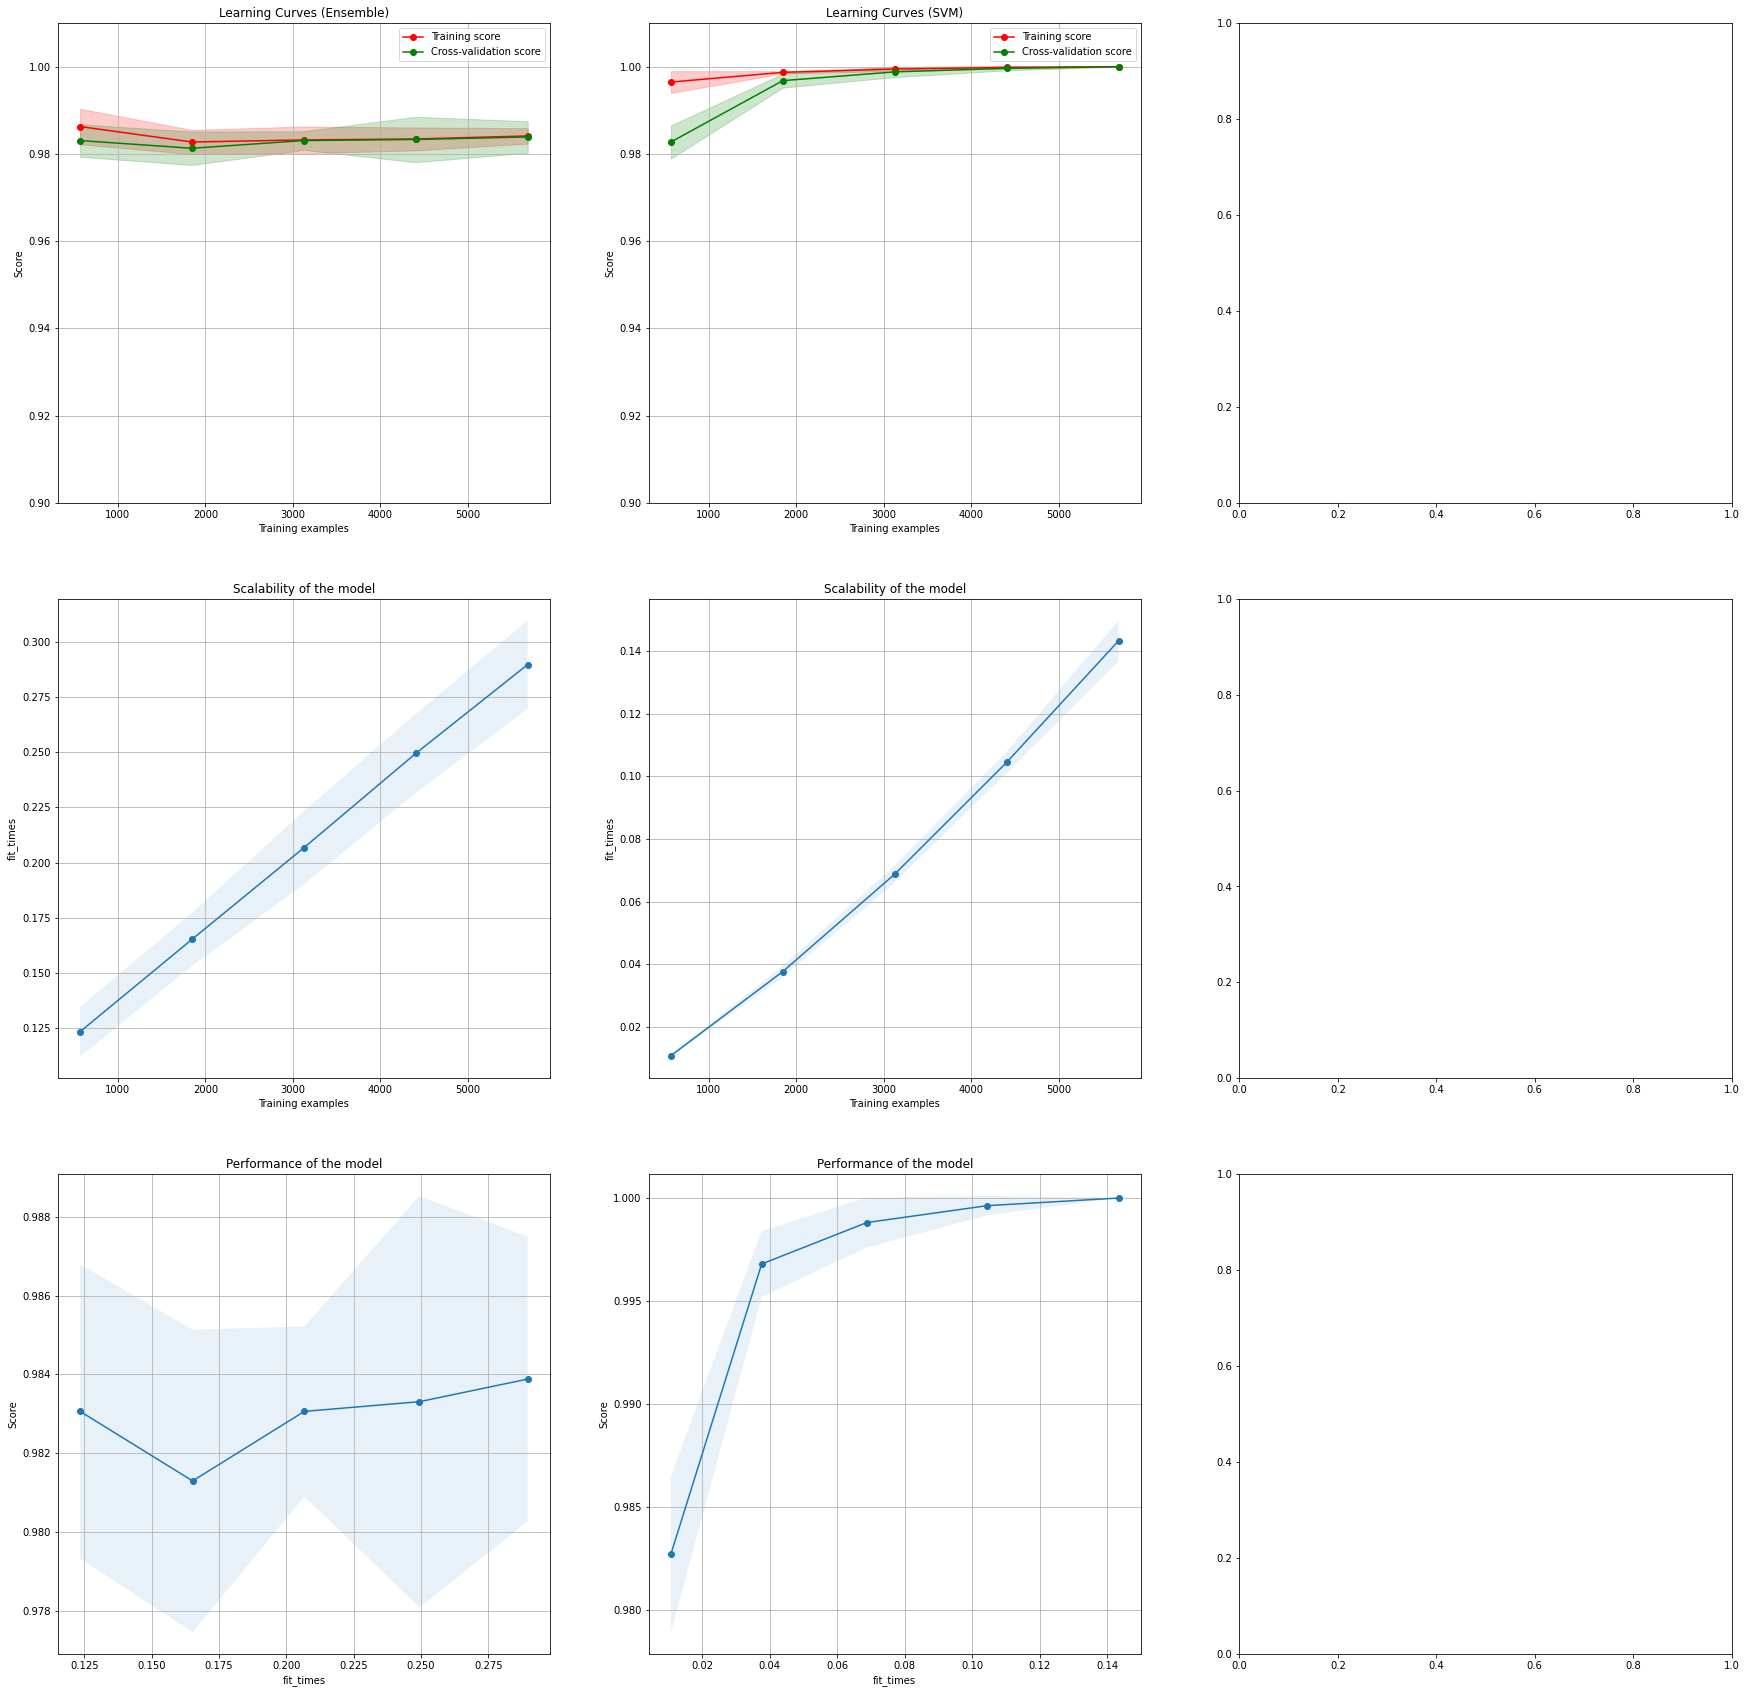

In [117]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3,3, figsize=(30, 30))


title = "Learning Curves (Ensemble)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = AdaBoostClassifier(random_state=7, learning_rate = 0.1, n_estimators= 60)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)



title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = SVC(kernel='rbf',random_state=42, C = 10)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.9, 1.01),
                    cv=cv, n_jobs=4)



plt.show()